In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Project/Pothole_detection_final/'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [15]:
DATADIR = '/content/drive/MyDrive/Project/Pothole_detection_final/'
CATEGORIES = ['Normal_road','Pothole_road']
IMG_SIZE=100

Sample image

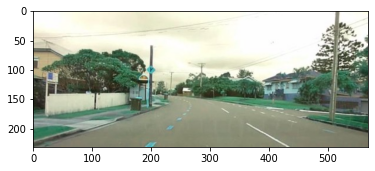

In [16]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break


Preprocessing Steps

In [11]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [17]:
print(len(training_data))

11688


storing trainig length for further use

In [18]:
lenofimage = len(training_data)

for image to be trained we have to convert the image to a array form so,that our model can train on it...!!

and X should be of type (training_data_length , -1) because SVM takes 2D input to train

In [19]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [20]:
X.shape


(11688, 30000)

flattening the array

In [21]:
X = X/255.0

Ex. of flattened array...

In [22]:
X[1]


array([0.61568627, 0.29411765, 0.03921569, ..., 0.31372549, 0.34509804,
       0.33333333])

note : y should be in array form compulsory.

In [23]:
y=np.array(y)

In [24]:
y.shape

(11688,)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

fitting our data in SVM model

In [26]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

predicting the X_test

In [27]:
y2 = svc.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.839151266255989


Formulating the Classification report

In [29]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1433
           1       0.83      0.86      0.84      1489

    accuracy                           0.84      2922
   macro avg       0.84      0.84      0.84      2922
weighted avg       0.84      0.84      0.84      2922



In [30]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [31]:
result

,original,predicted
0,1,1
1,0,0
2,1,1
3,1,0
4,1,0
...,...,...
2917,1,1
2918,1,1
2919,0,0
2920,0,0
